In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('forex.csv', index_col=['date'], parse_dates=['date'], dayfirst=True) #forex.csv
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094
...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751


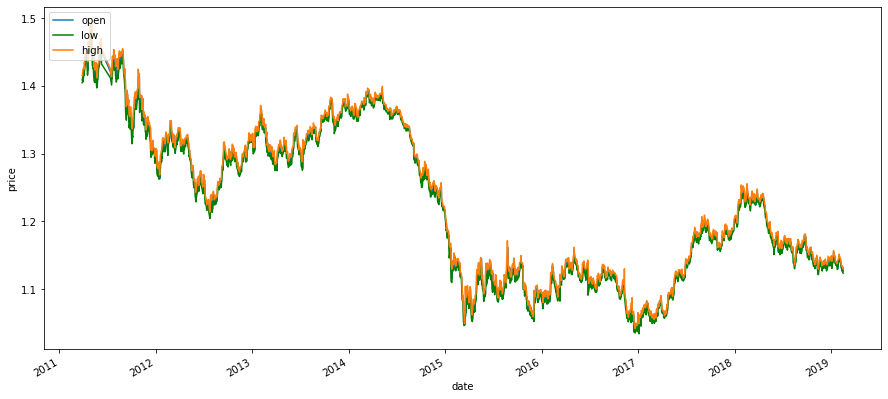

In [3]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

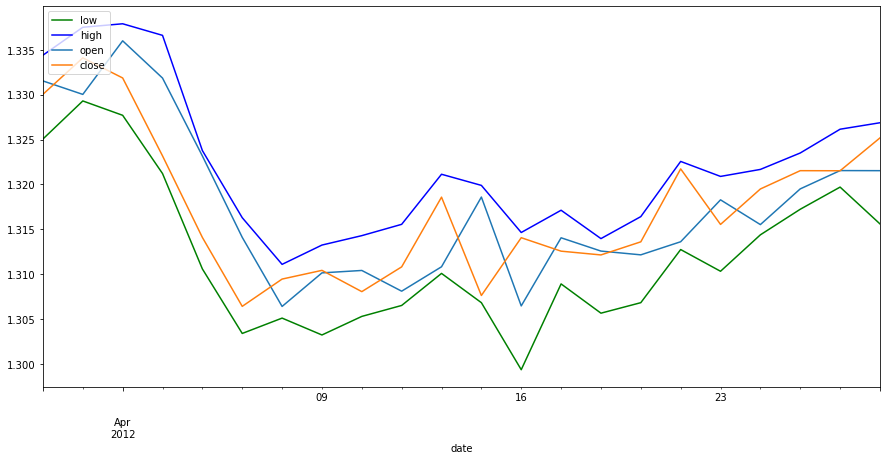

In [4]:
plt.figure(figsize(15,7))
df.loc['2012-03-29':'2012-04-29'].low.plot(color='g')
df.loc['2012-03-29':'2012-04-29'].high.plot(color='b')
df.loc['2012-03-29':'2012-04-29'].open.plot()
df.loc['2012-03-29':'2012-04-29'].close.plot()
plt.legend(loc='upper left')

In [5]:
df.drop(columns=['open', 'high', 'low', 'volume'],inplace=True)
df.head()

,close
date,
2011-03-29,1.4113
2011-03-30,1.4126
2011-03-31,1.4174
2011-04-01,1.4234
2011-04-04,1.4218


## анализ ряда

In [6]:
'''
df2 = pd.DataFrame(index=df.index[0:6])#, index_col=['date']) #, parse_dates=['date'])
df2['open']=df['open']
df2
'''

"\ndf2 = pd.DataFrame(index=df.index[0:6])#, index_col=['date']) #, parse_dates=['date'])\ndf2['open']=df['open']\ndf2\n"

Критерий Дики-Фуллера: p=0.401732


<Figure size 1080x720 with 0 Axes>

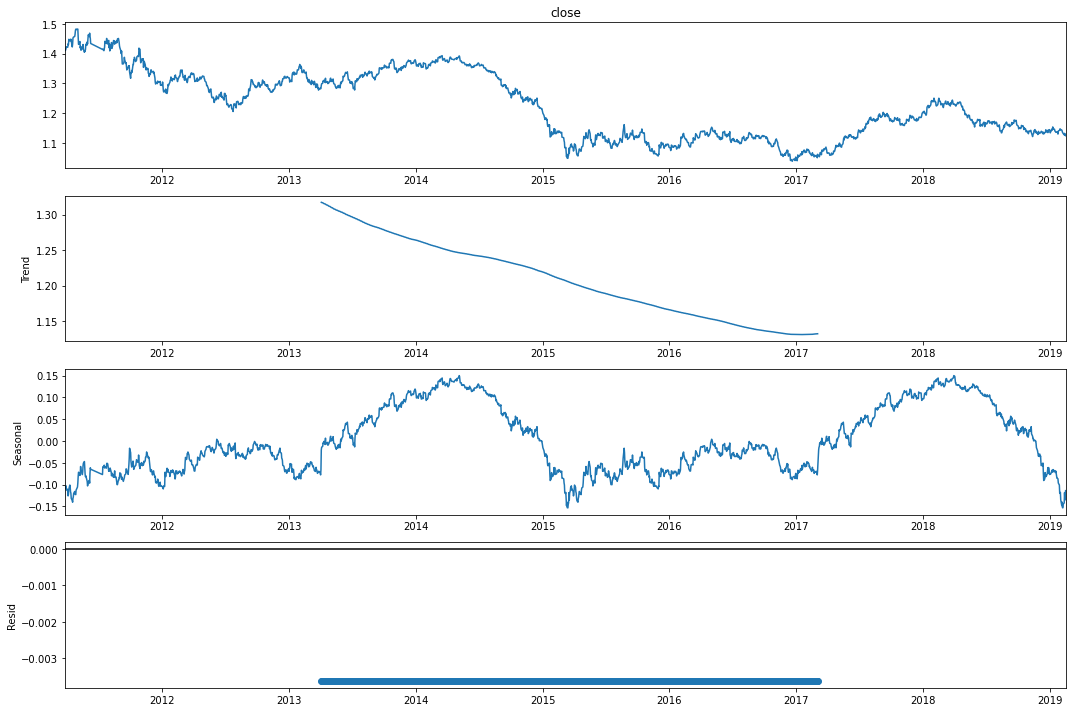

In [7]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df.close,  period = 1024).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.close)[1])

# Бокс-Кокс

Оптимальный параметр преобразования Бокса-Кокса: -0.793485
Критерий Дики-Фуллера: p=0.459559


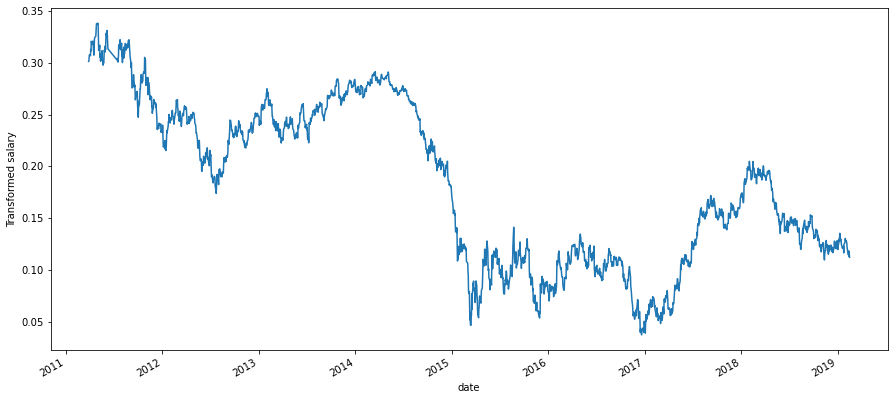

In [8]:
df['close'], lmbda = stats.boxcox(df['close'])
plt.figure(figsize(15,7))
df['close'].plot()
plt.ylabel(u'Transformed salary')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df)[1])

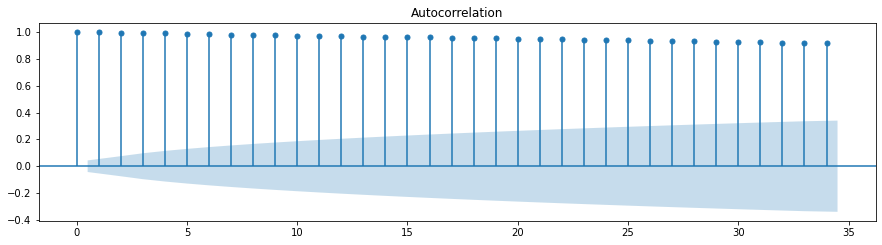

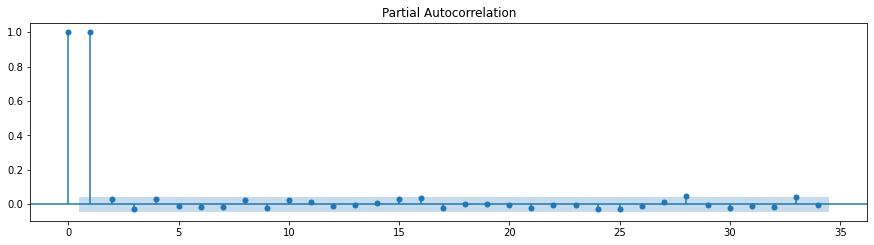

In [9]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['close'].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['close'].values.squeeze(), ax=ax)
pylab.show()

### Диффиренцирование

In [10]:
'''
df['data_diff12'] = df.close - df.close.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff12'][12:],period = 1018).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff12'][12:])[1])
'''

'\ndf[\'data_diff12\'] = df.close - df.close.shift(12)\nplt.figure(figsize(15,10))\nsm.tsa.seasonal_decompose(df[\'data_diff12\'][12:],period = 1018).plot()\nprint("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df[\'data_diff12\'][12:])[1])\n'

243 - 243
510 - 267
769 - 259
1030 - 261
1293 - 263
1557 - 264
1819 - 262
shift in a year between 20xx.03.29 (df starting date)

## на единичку

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

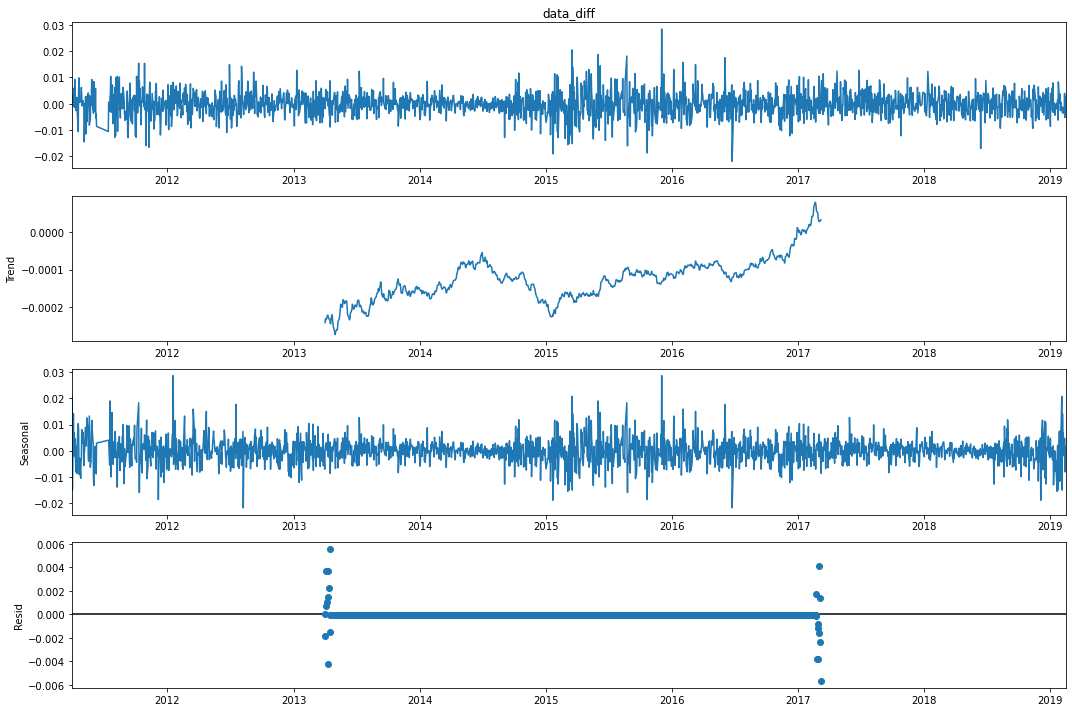

In [11]:
df['data_diff'] = df['close'] - df['close'].shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff'][1:],period = 1018).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff'][1:])[1])

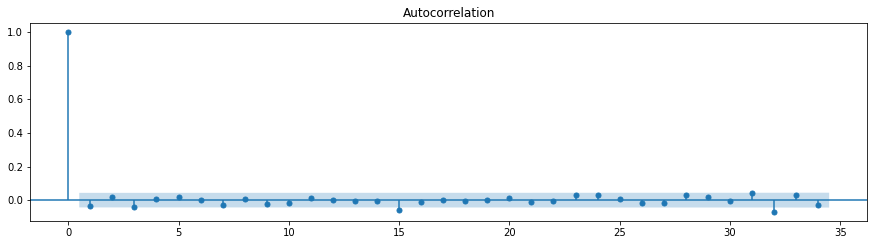

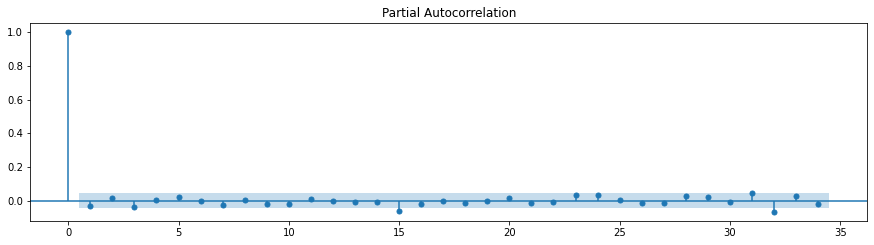

In [12]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff'][1:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff'][1:].values.squeeze(), ax=ax)
pylab.show()

## На неделю

In [13]:
(267+259+261+263*3)/6

262.6666666666667

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

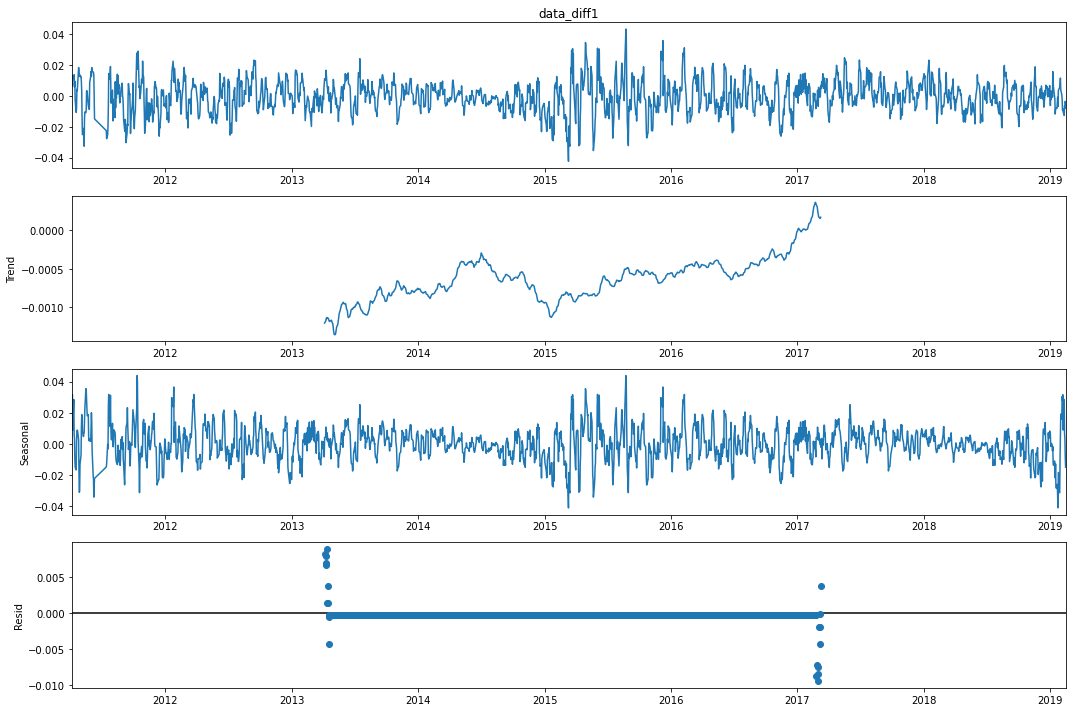

In [14]:
df['data_diff1'] = df['close'] - df['close'].shift(5)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff1'][5:],period = 1017).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff1'][13:])[1])

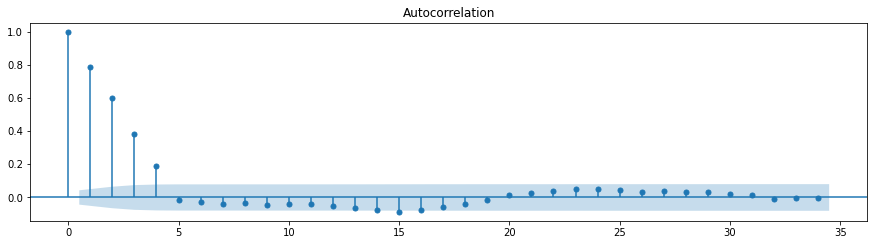

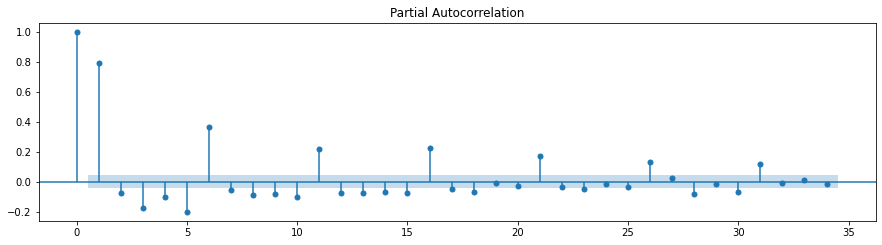

In [15]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff1'][5:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff1'][5:].values.squeeze(), ax=ax)
pylab.show()

In [16]:
#df.loc['2012-04-29':'2012-05-20']

## На месяц

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

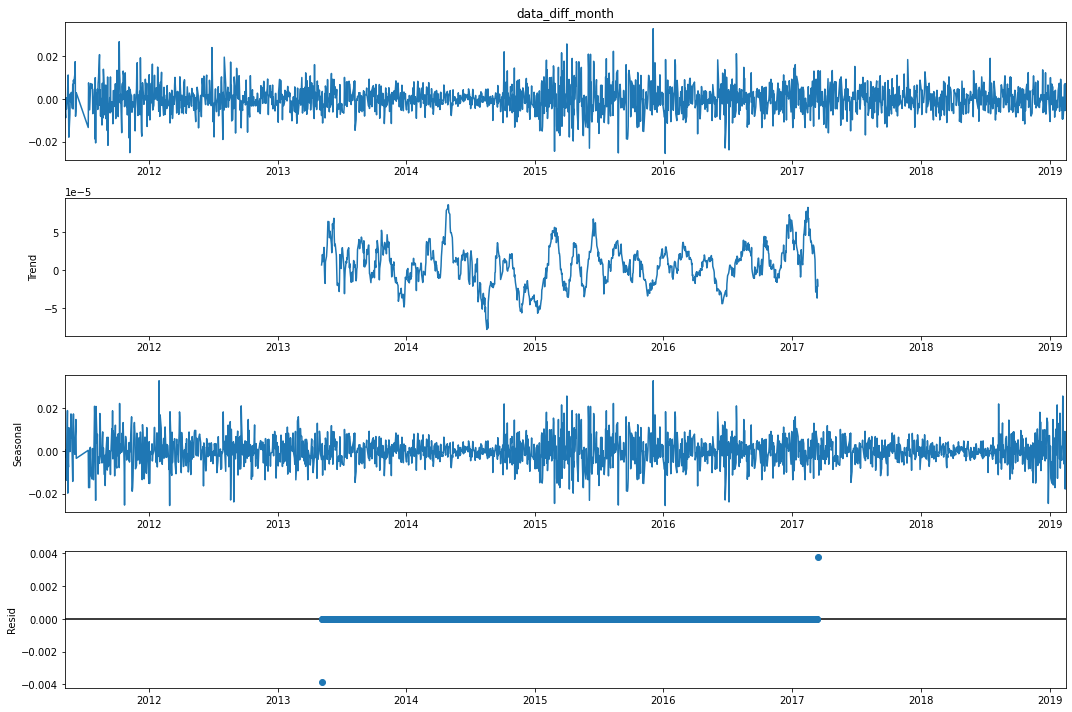

In [17]:
df['data_diff_month'] = df['data_diff'] - df['data_diff'].shift(22)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_month'][30:],period = 1009).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_month'][30:])[1])

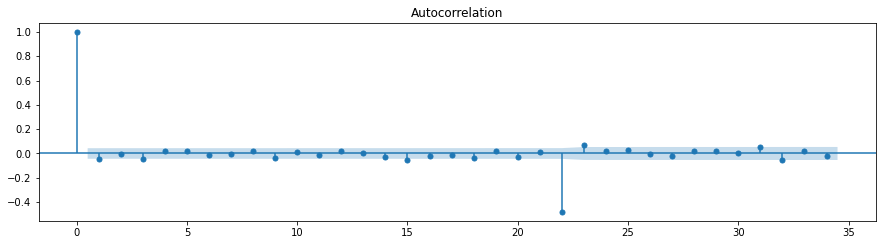

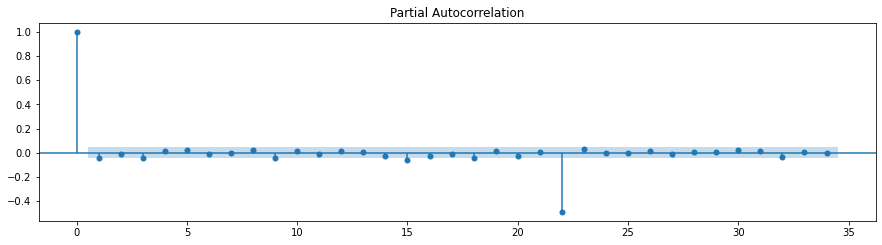

In [18]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_month'][30:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_month'][30:].values.squeeze(), ax=ax)
pylab.show()

In [19]:
#df.loc['2011-04-20':'2011-05-05']

## На год

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

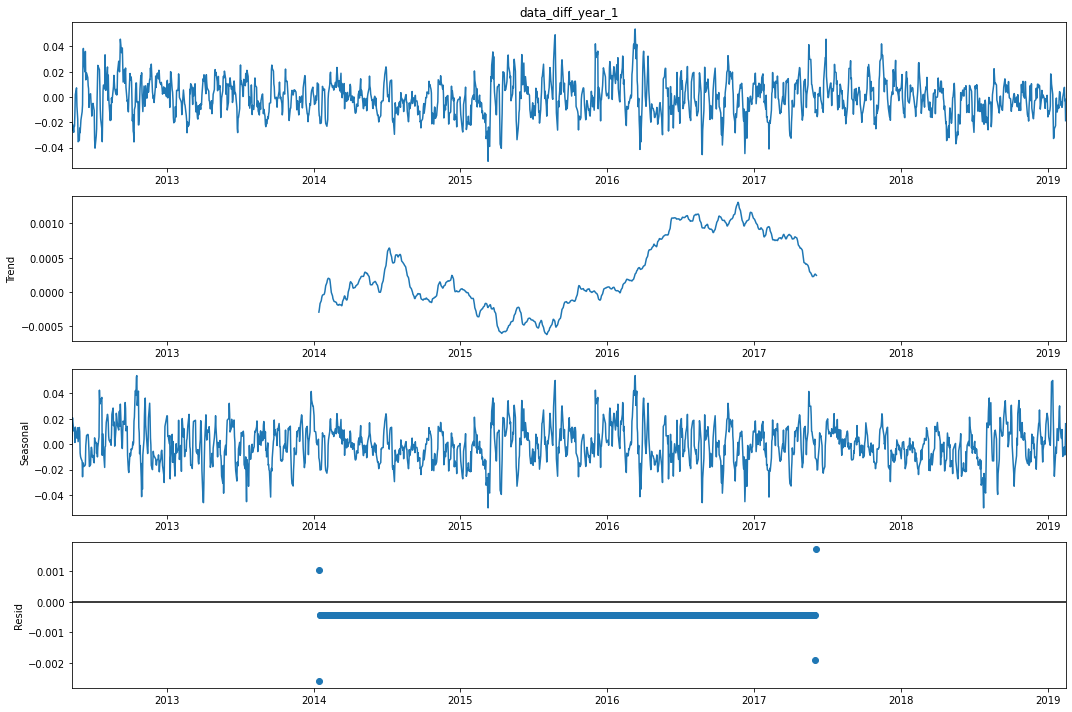

In [20]:
df['data_diff_year_1'] = df['data_diff1'] - df['data_diff1'].shift(263)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_year_1'][270:],period = 888).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_year_1'][270:])[1])

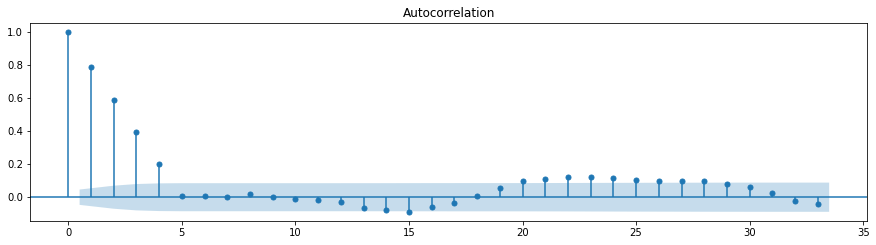

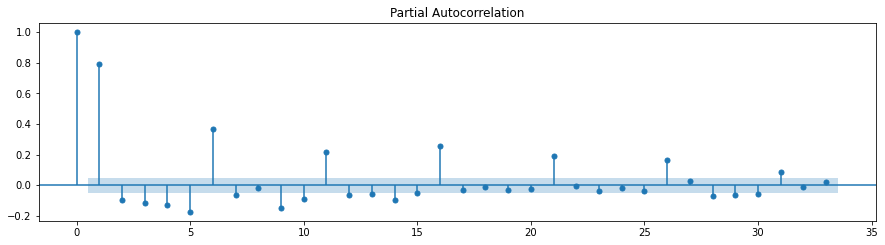

In [21]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_year_1'][270:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_year_1'][270:].values.squeeze(), ax=ax)
pylab.show()

## Год с месяцем

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

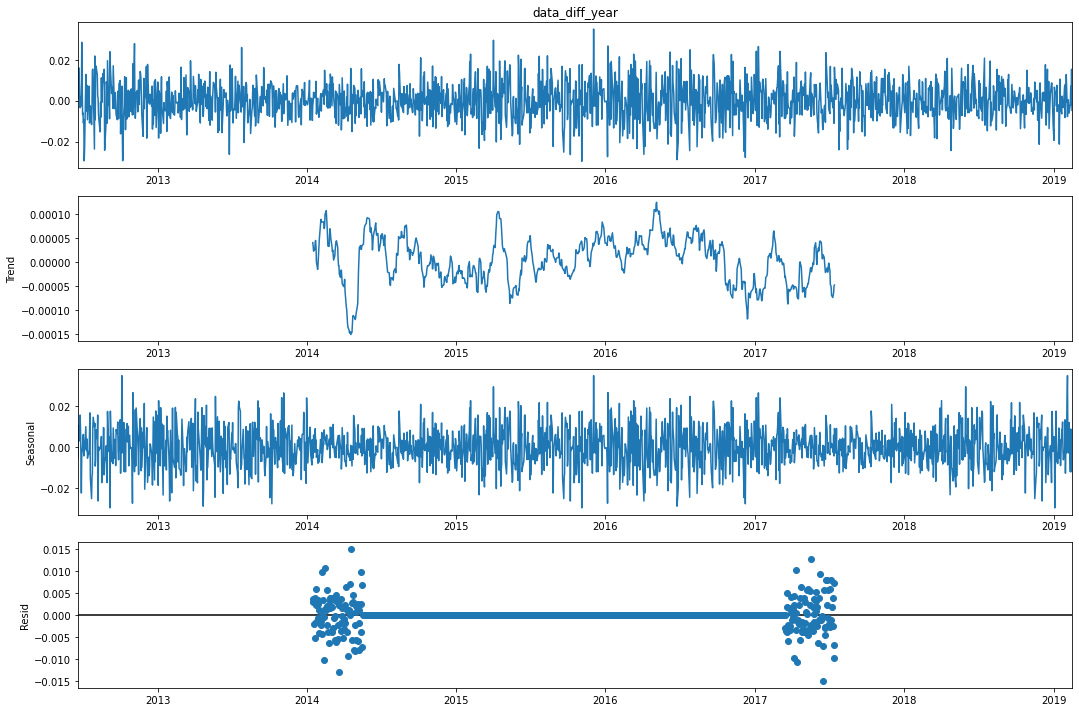

In [22]:
df['data_diff_year'] = df['data_diff_month'] - df['data_diff_month'].shift(263)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_year'][300:],period = 830).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_year'][300:])[1])

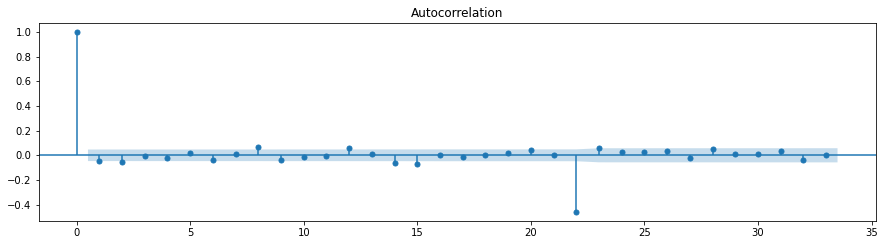

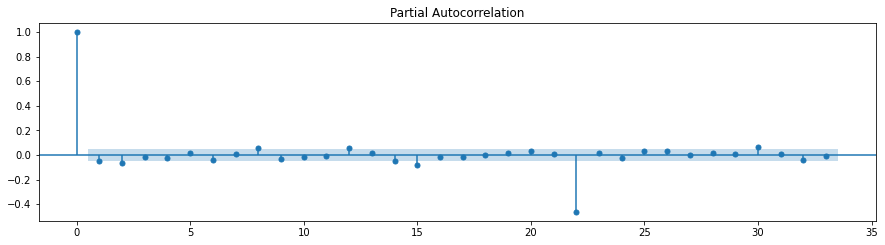

In [23]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_year'][300:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_year'][300:].values.squeeze(), ax=ax)
pylab.show()

# Saving Early

In [24]:
data = pd.DataFrame(data={'close' : df['data_diff_month'][30:]},
                   index=df.index[30:])
data.head()

,close
date,
2011-05-10,-0.006972
2011-05-11,-0.008897
2011-05-12,0.000497
2011-05-13,-0.004880
2011-05-16,-0.000116


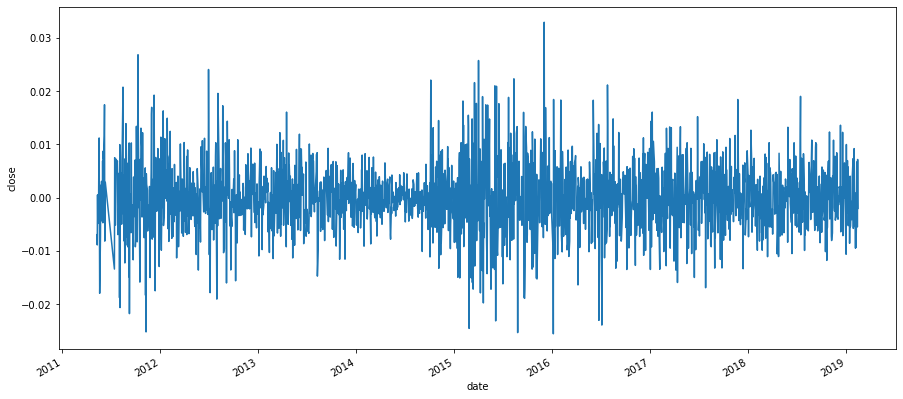

In [25]:
plt.figure(figsize(15,7))
data['close'].plot() 
plt.ylabel('close')
pylab.show()

In [26]:
#data.to_csv('data_Arima_23_05.csv')